In [53]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression
# Métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from tqdm import tqdm
import warnings

df = pd.read_csv("https://storage.googleapis.com/breathecode/project-files/bank-marketing-campaign-data.csv", sep=";")


<h3>Análisis Descriptivo

In [54]:
## Obtener las dimensiones
df.shape

(41188, 21)

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


<h3>Análisis Univariante</h3>

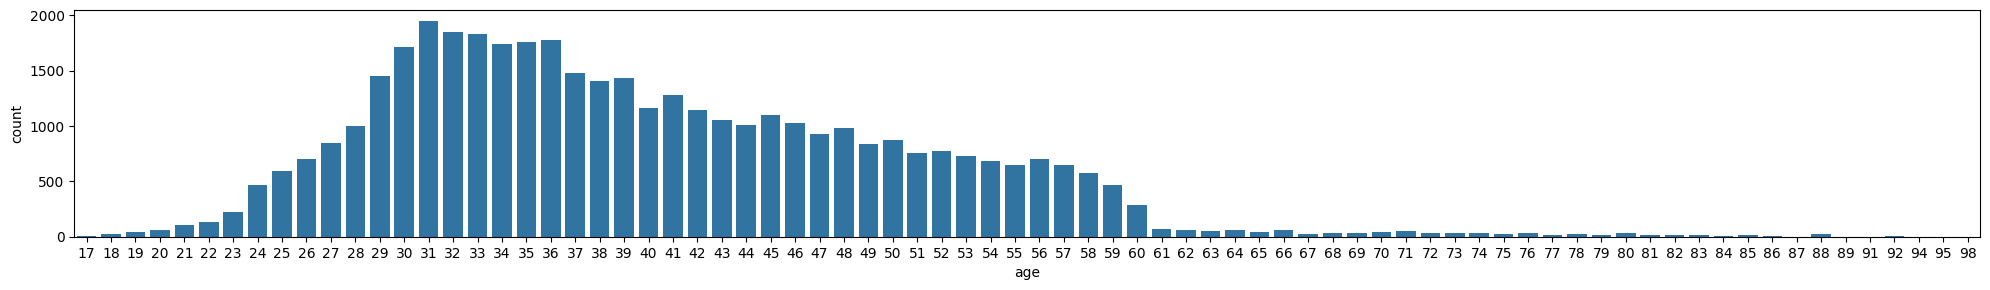

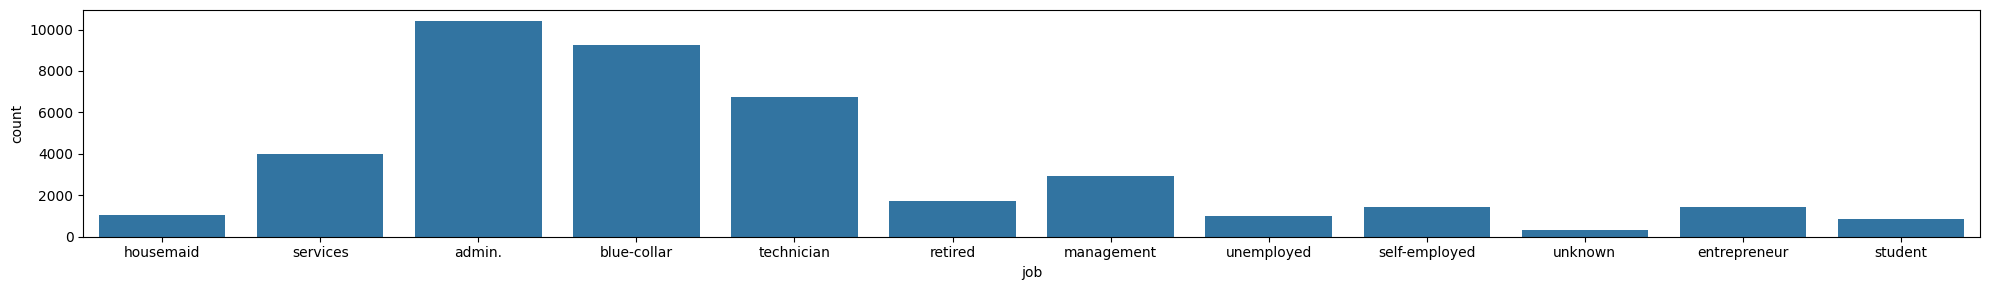

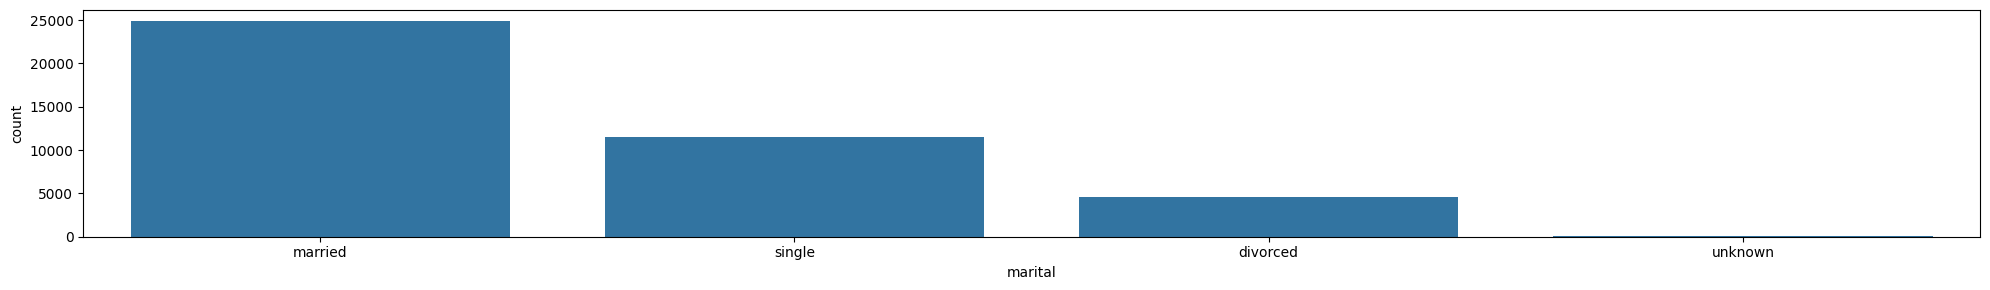

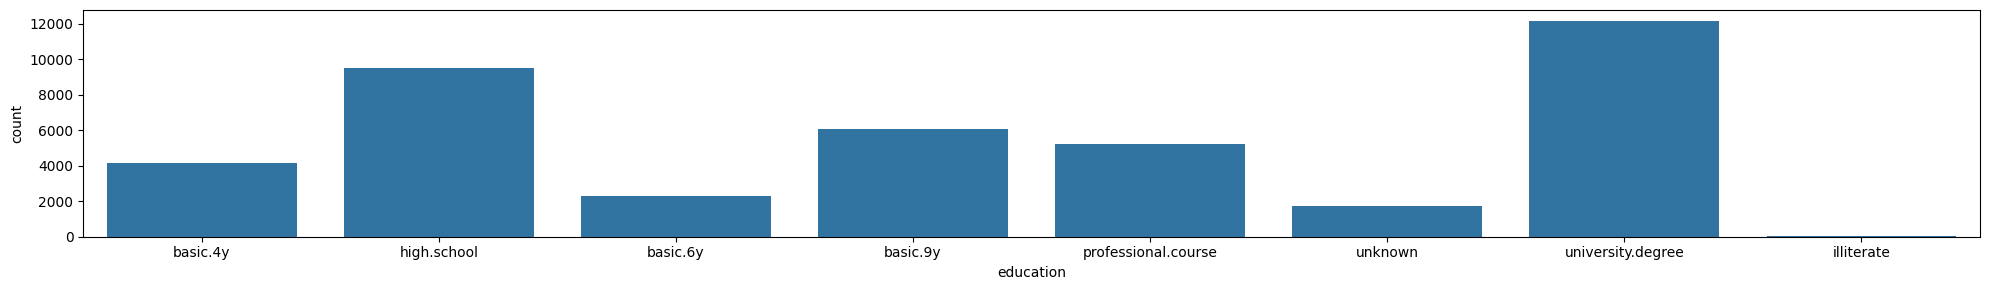

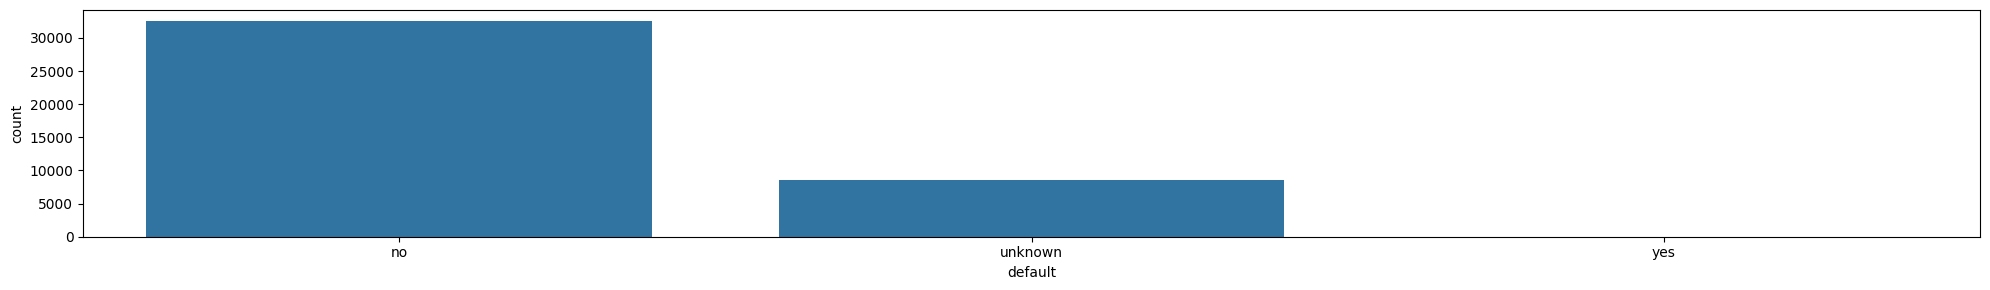

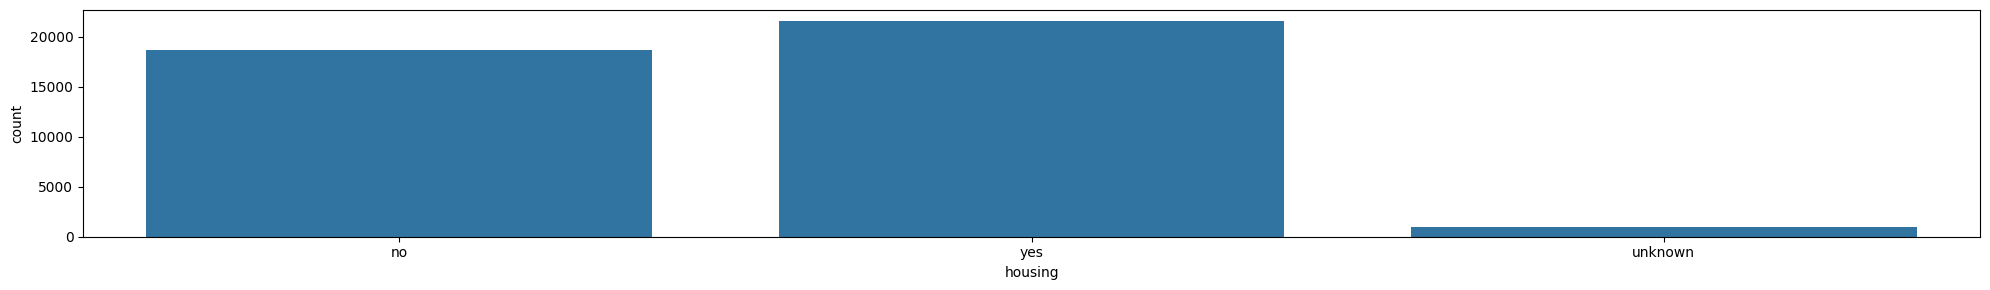

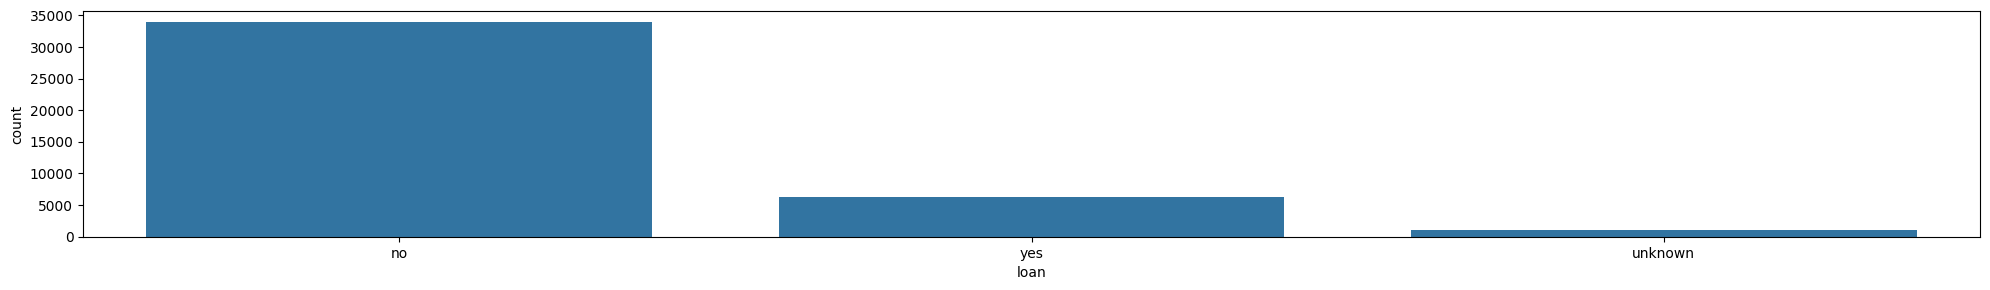

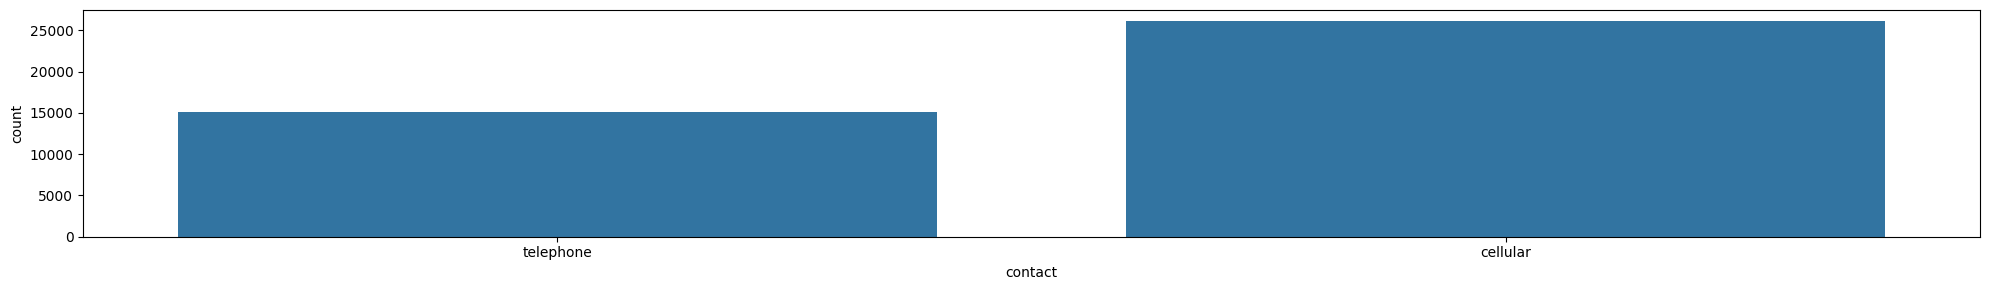

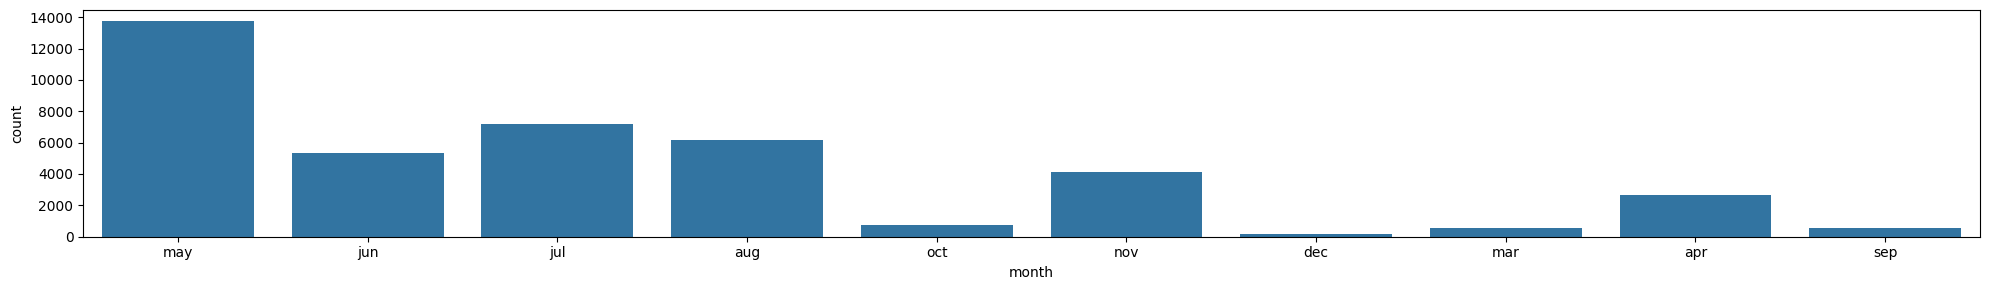

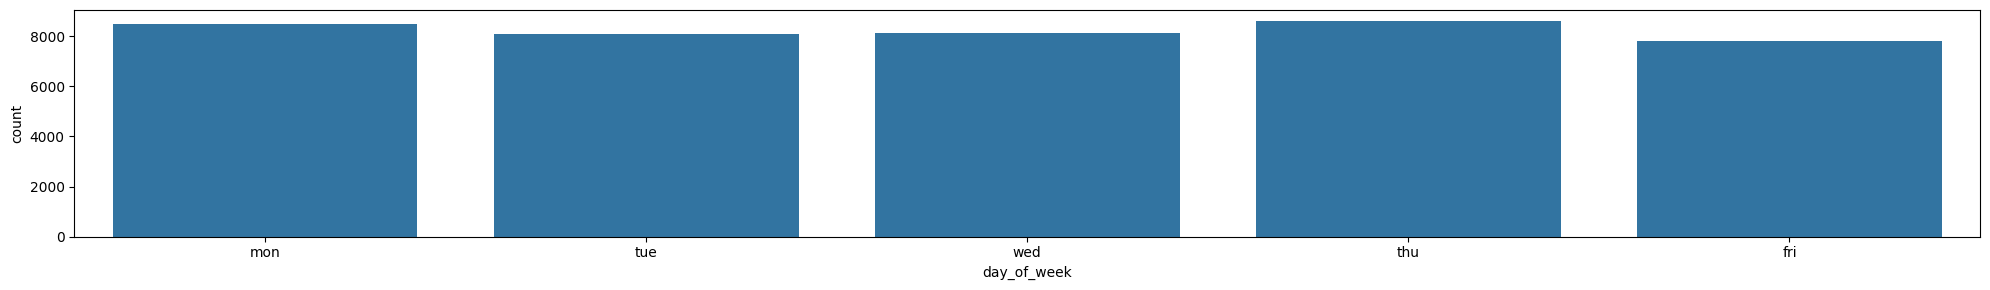

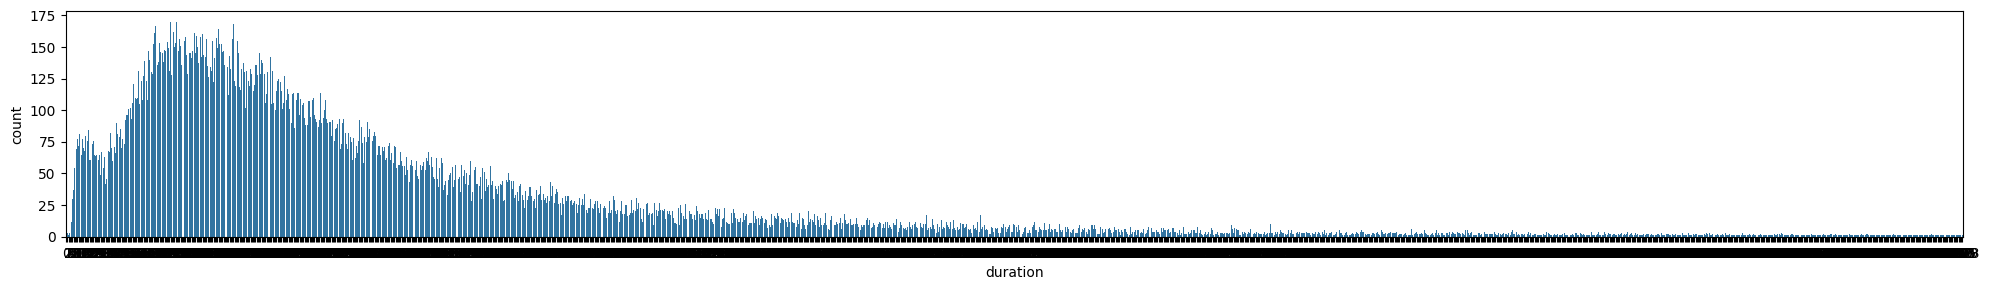

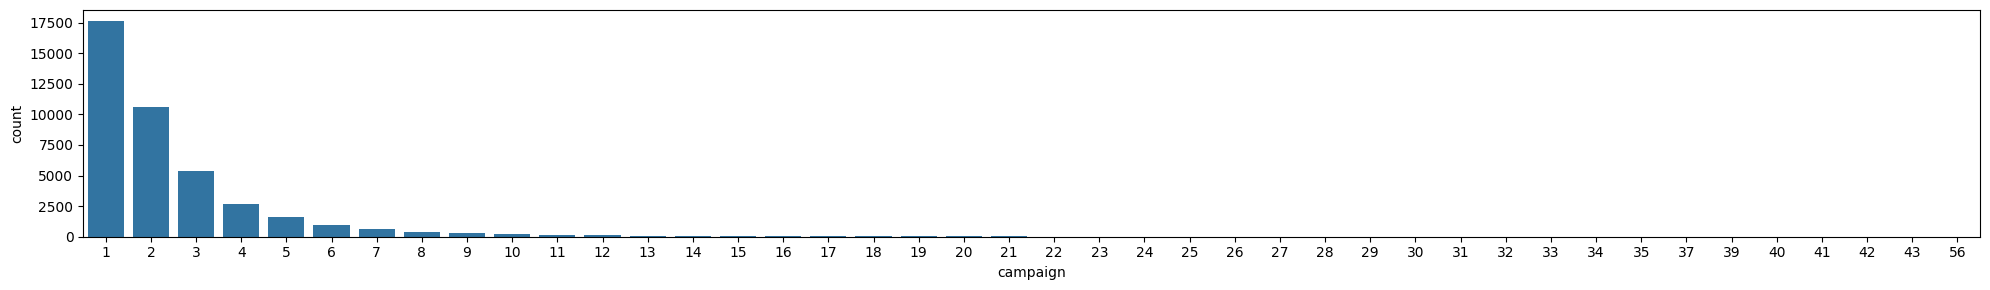

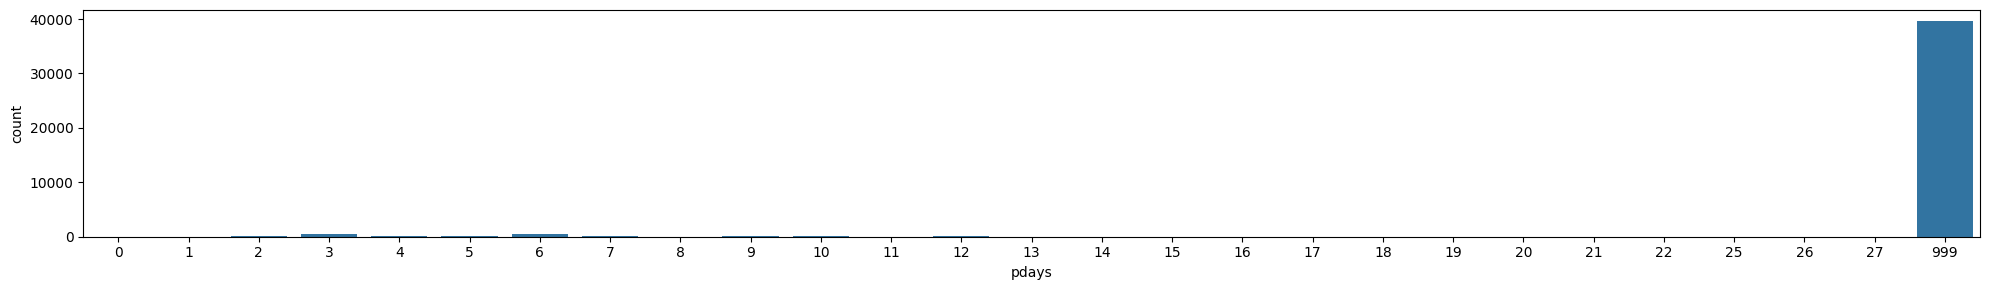

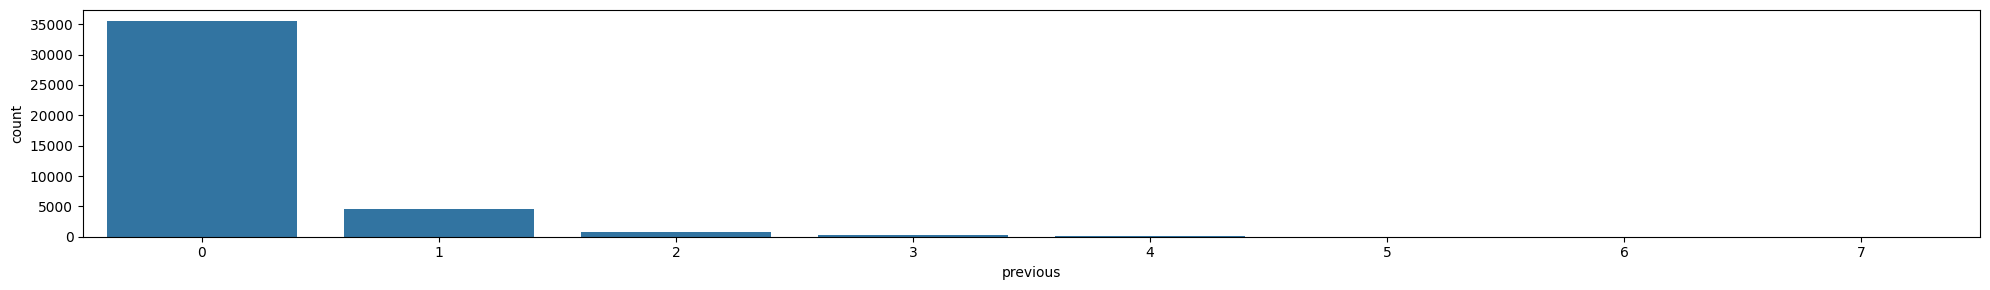

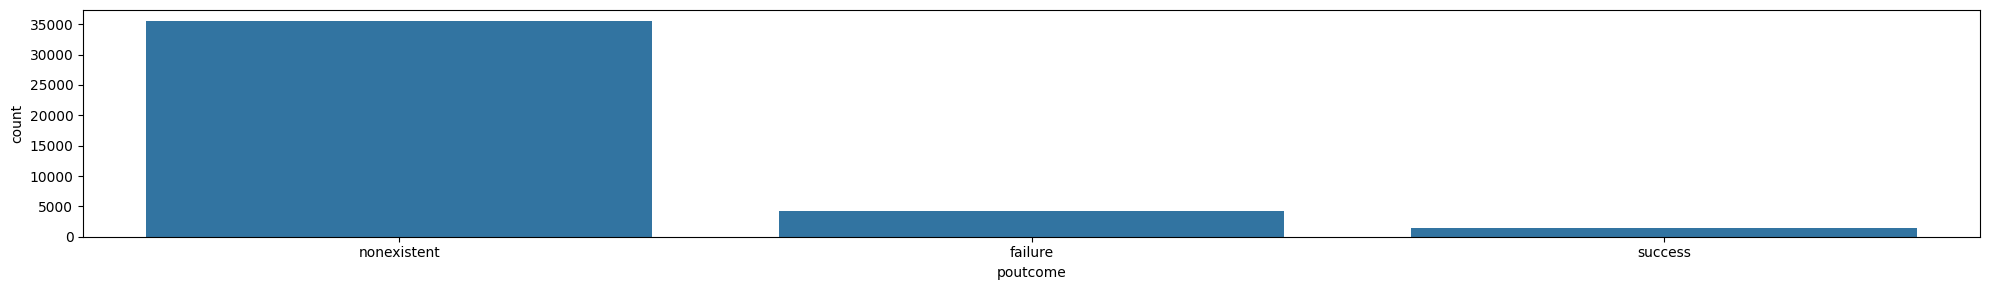

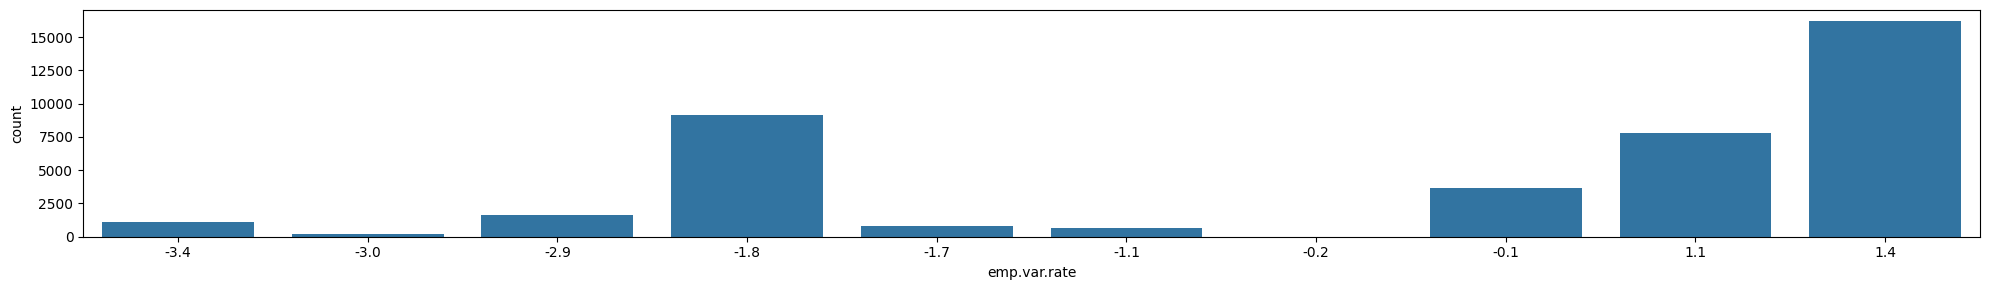

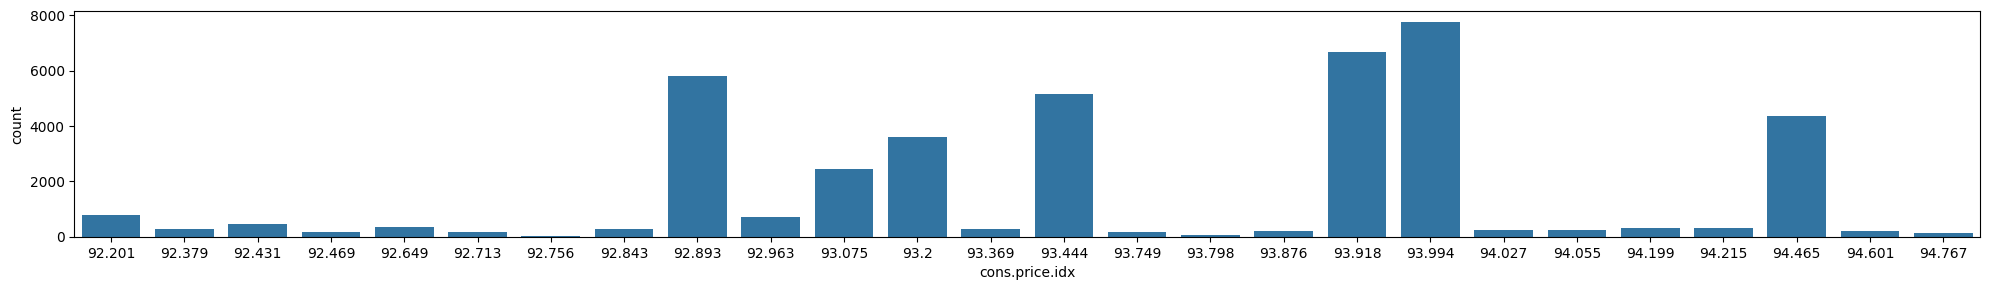

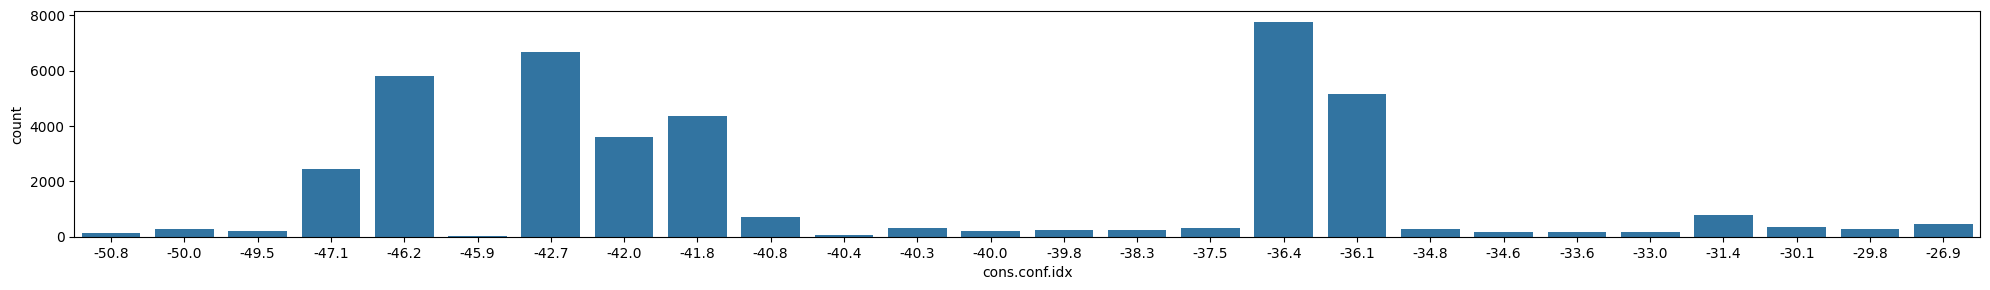

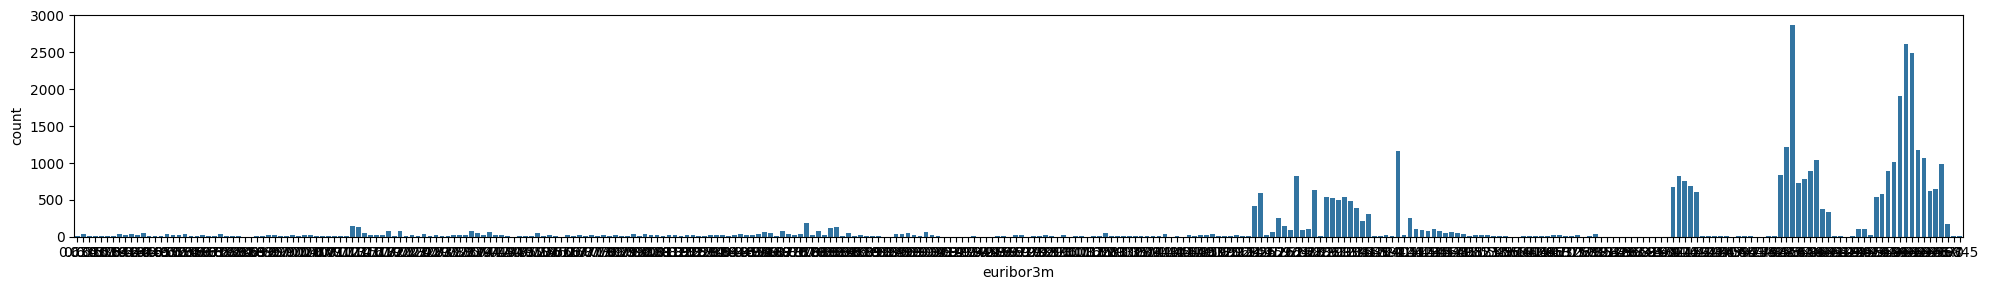

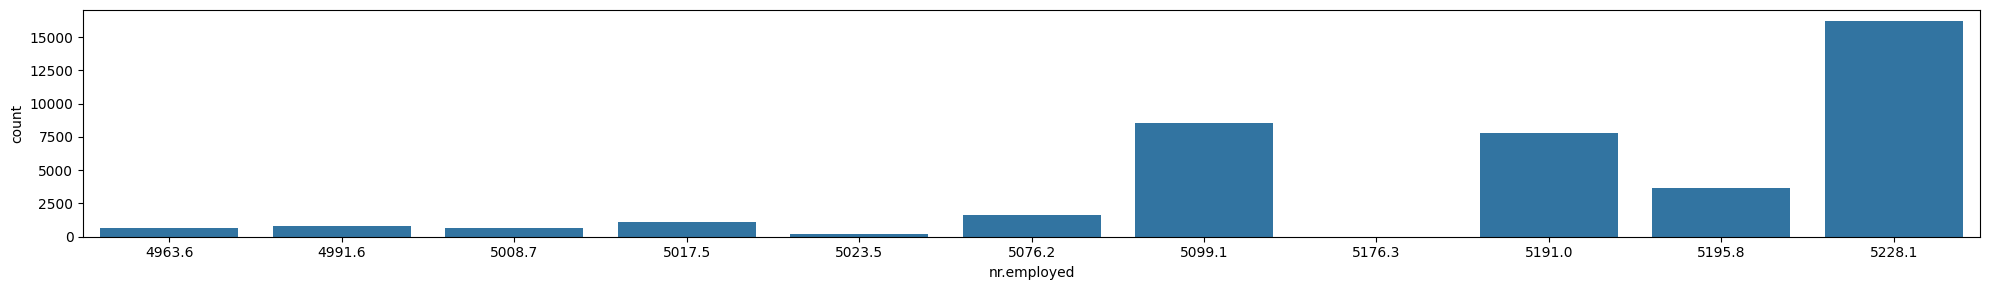

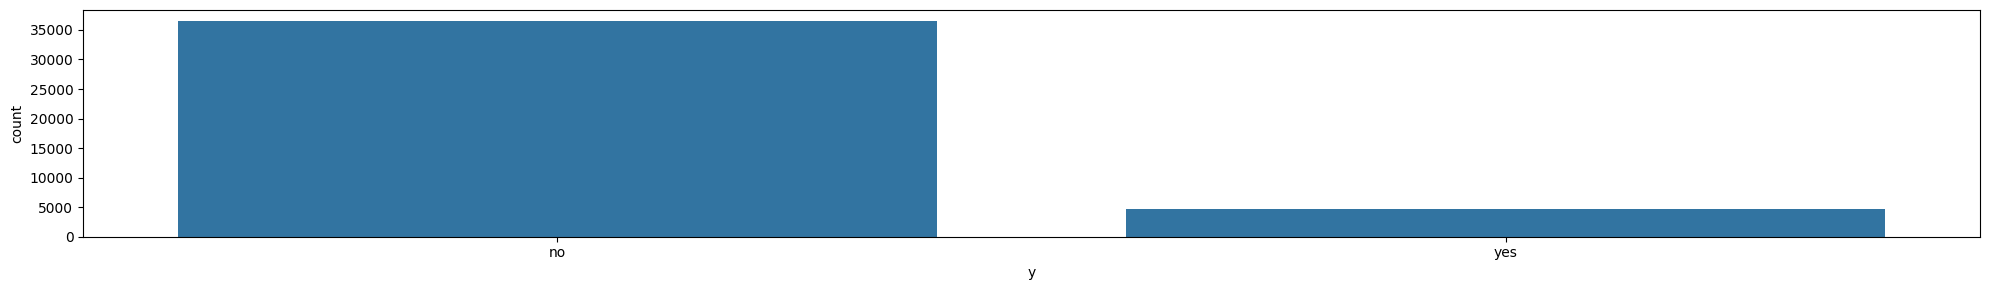

In [56]:
for columnas in df:
    fig, axis = plt.subplots(figsize=(20, 3))
    sns.countplot(data=df, x=columnas)
    plt.tight_layout()
    plt.show()

In [57]:
#variables a eliminar
df.drop(["nr.employed","cons.conf.idx","poutcome","day_of_week","default"], axis=1, inplace=True)
df

,age,job,marital,education,housing,loan,contact,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,261,1,999,0,1.1,93.994,4.857,no
1,57,services,married,high.school,no,no,telephone,may,149,1,999,0,1.1,93.994,4.857,no
2,37,services,married,high.school,yes,no,telephone,may,226,1,999,0,1.1,93.994,4.857,no
3,40,admin.,married,basic.6y,no,no,telephone,may,151,1,999,0,1.1,93.994,4.857,no
4,56,services,married,high.school,no,yes,telephone,may,307,1,999,0,1.1,93.994,4.857,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,334,1,999,0,-1.1,94.767,1.028,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,383,1,999,0,-1.1,94.767,1.028,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,189,2,999,0,-1.1,94.767,1.028,no
41186,44,technician,married,professional.course,no,no,cellular,nov,442,1,999,0,-1.1,94.767,1.028,yes


Analisis bivariante con la variable predictora

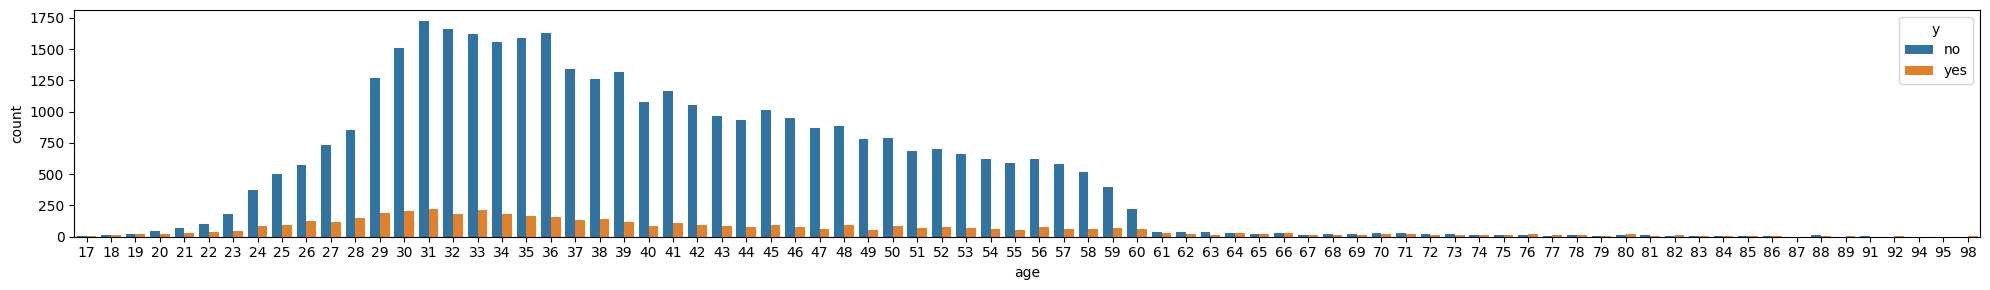

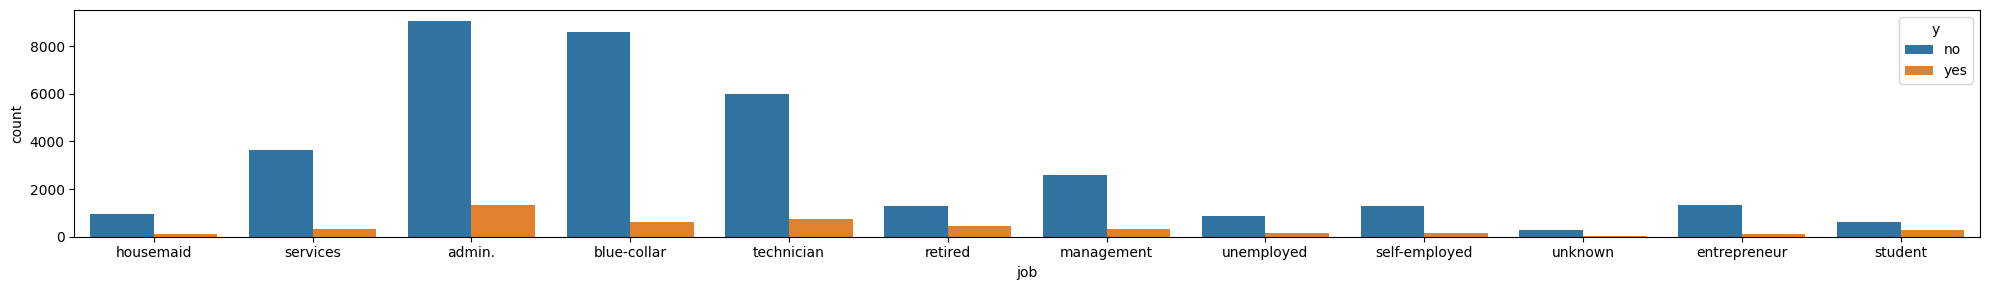

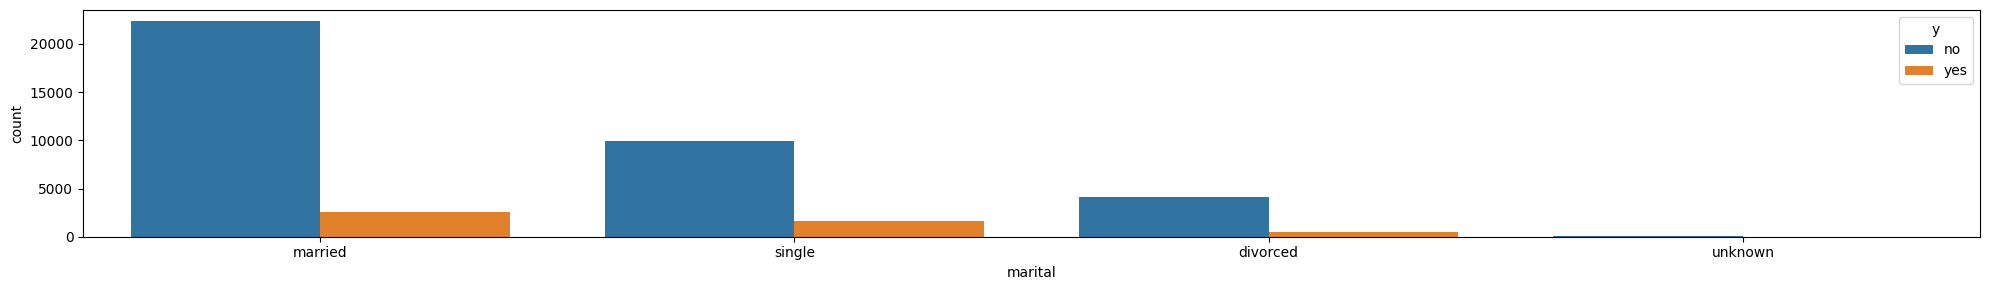

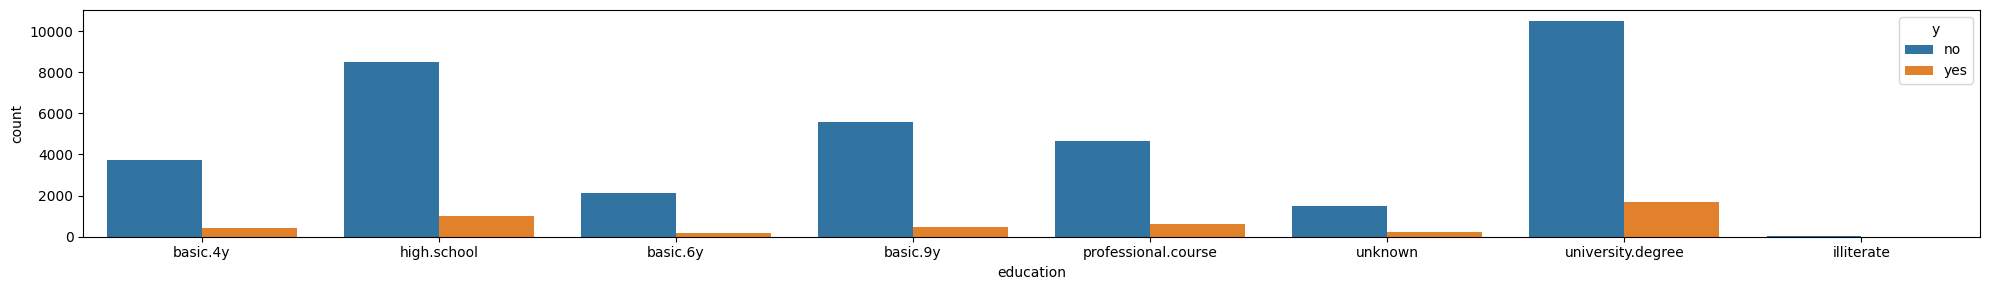

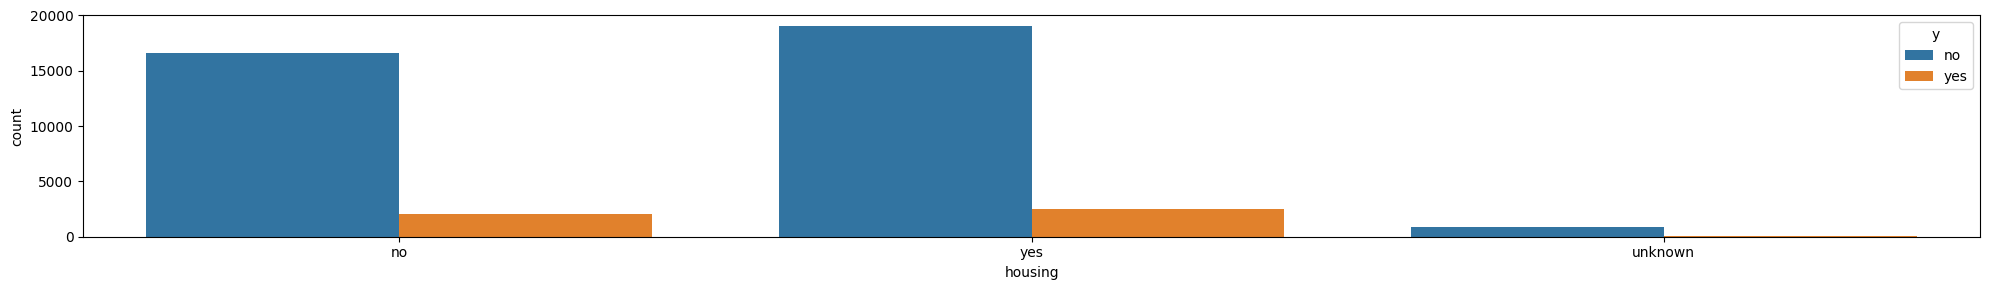

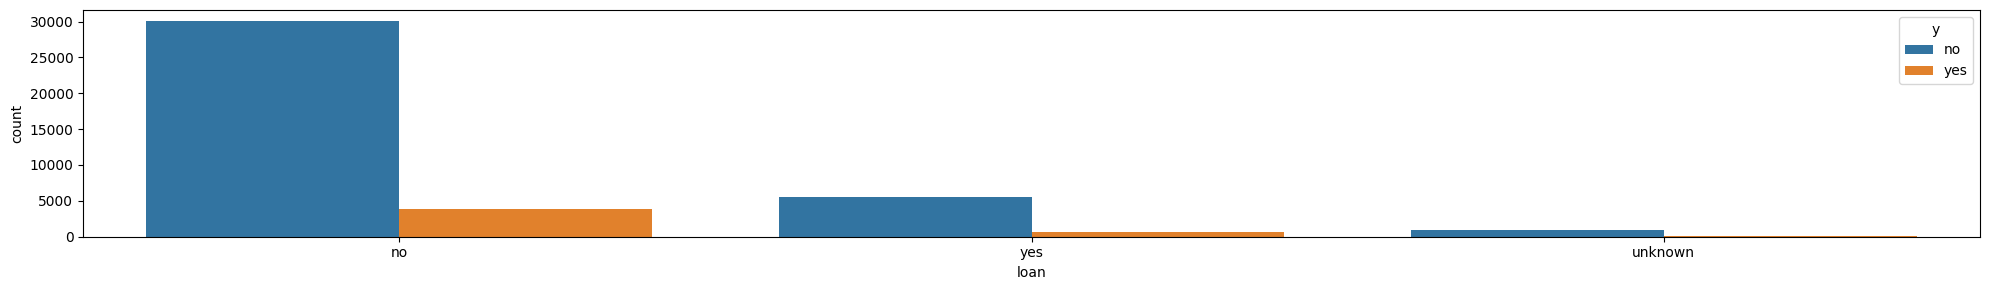

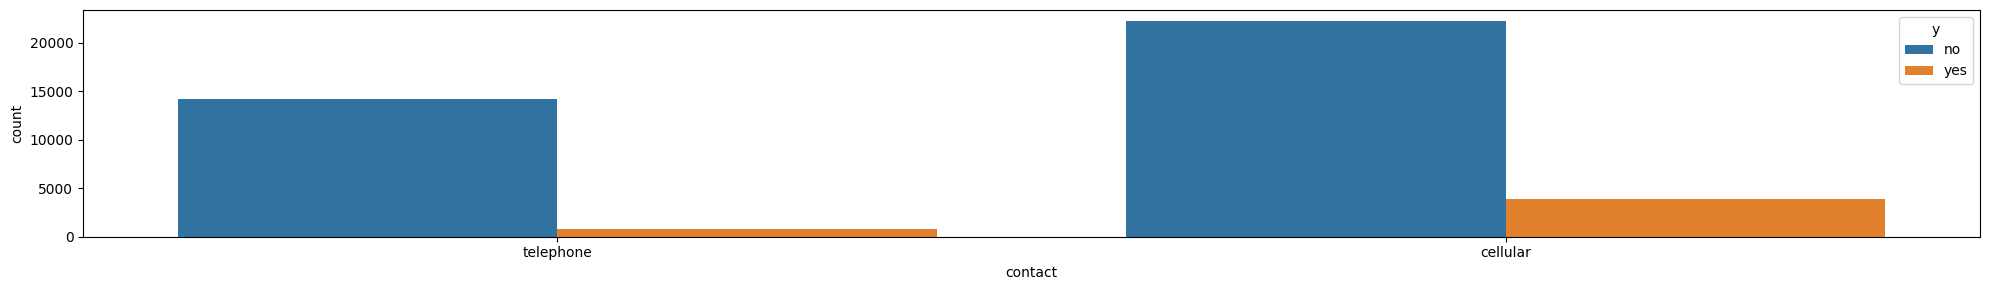

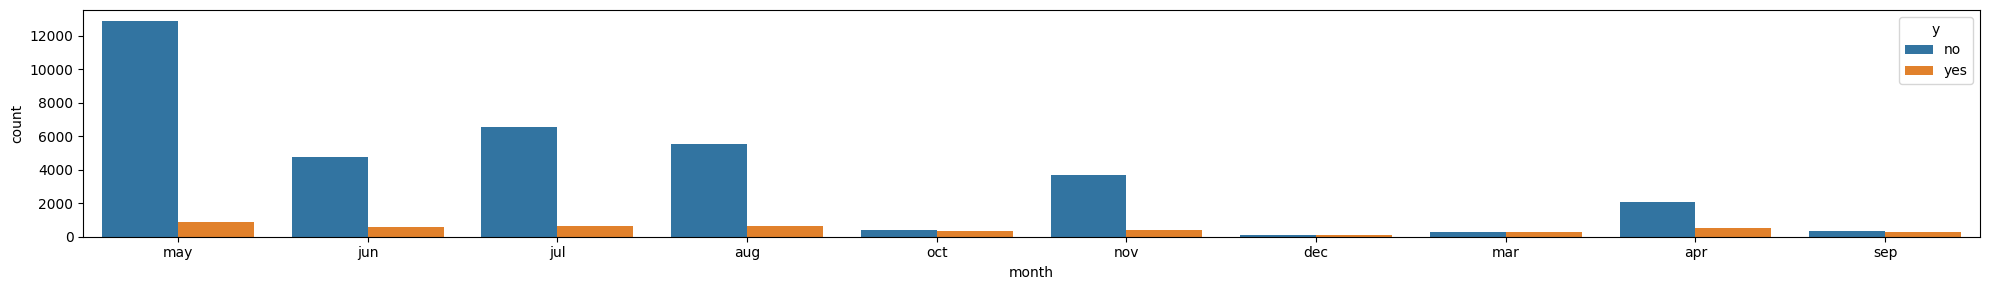

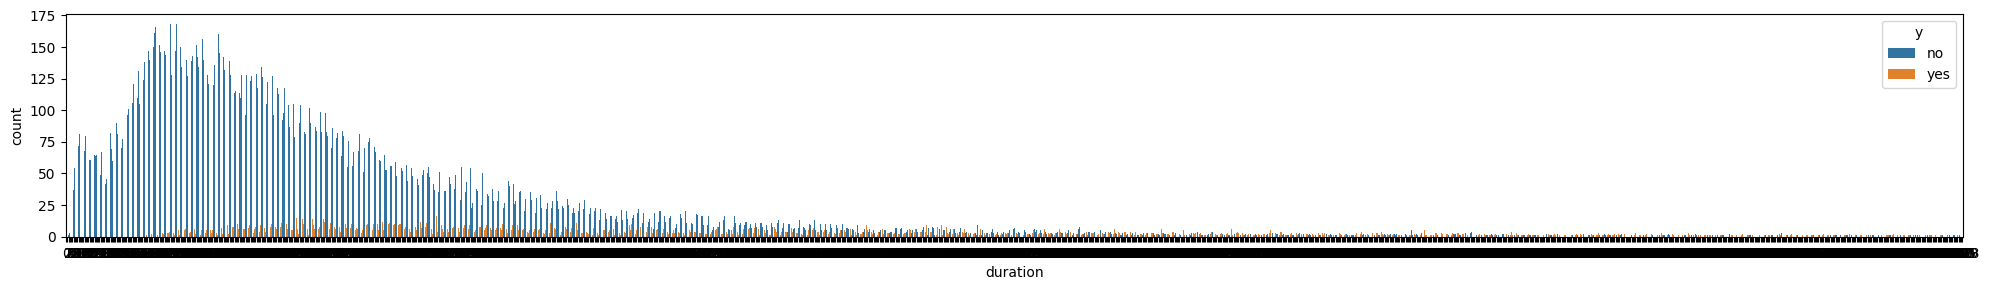

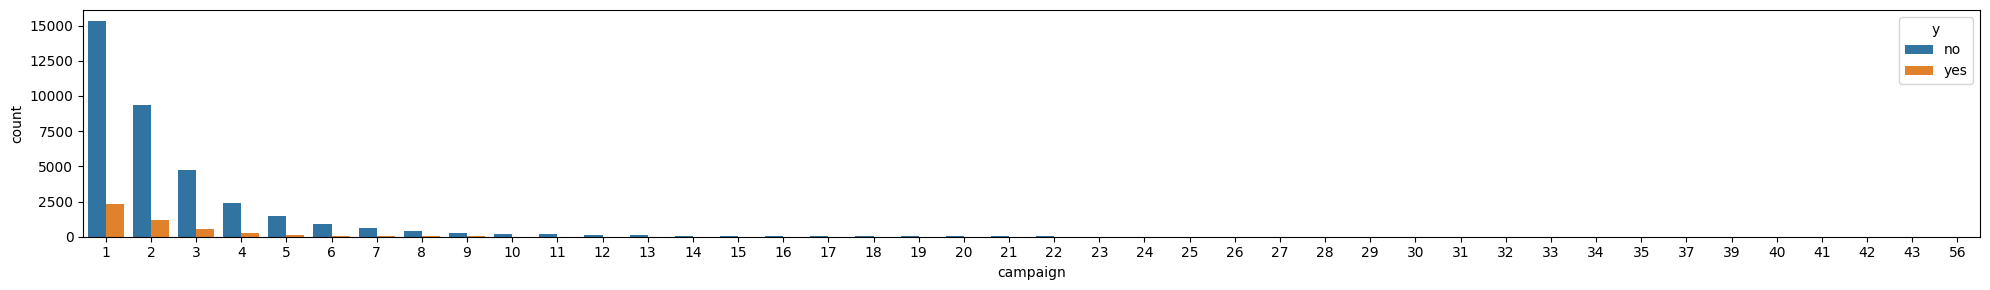

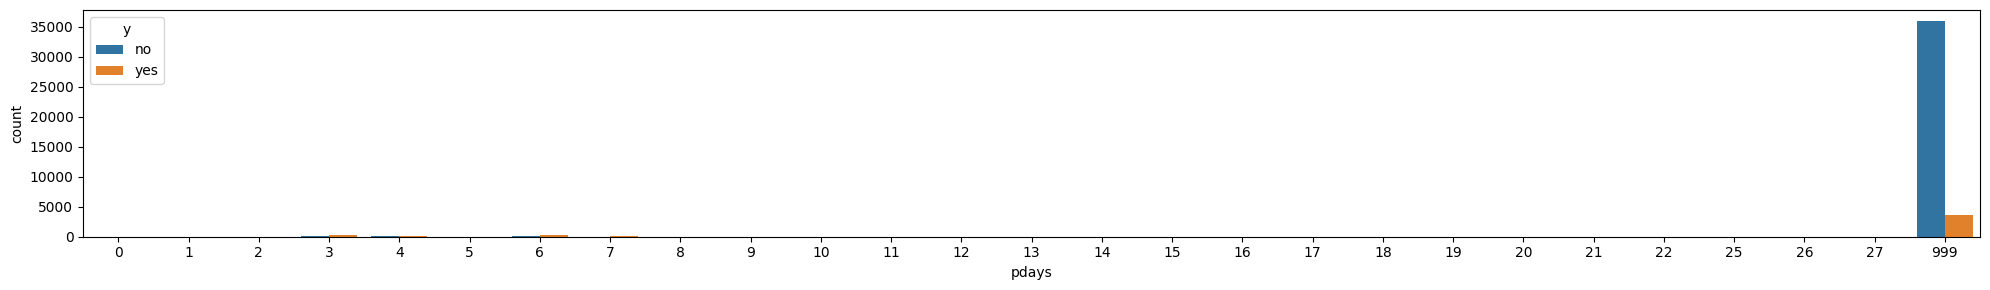

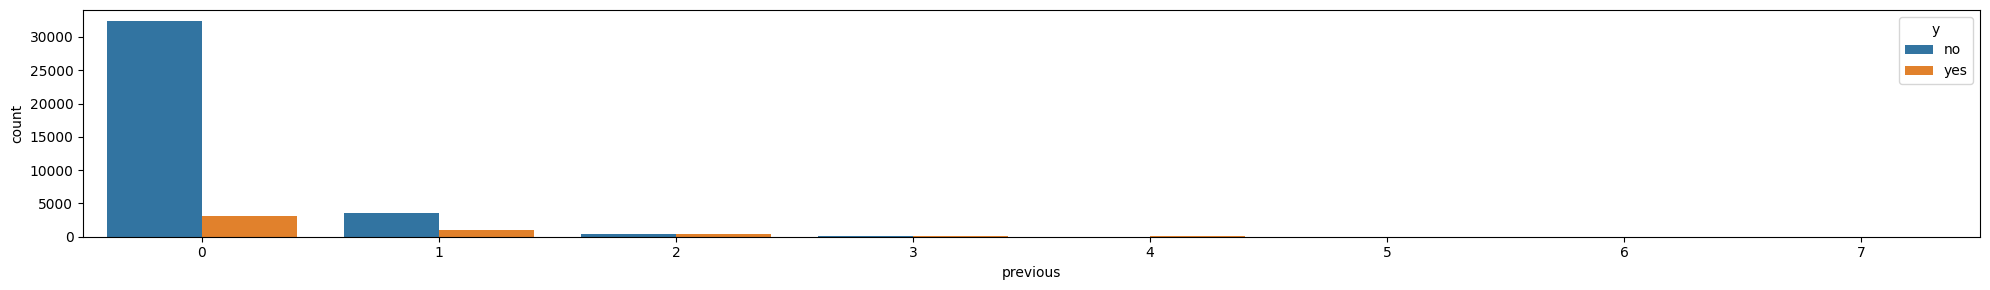

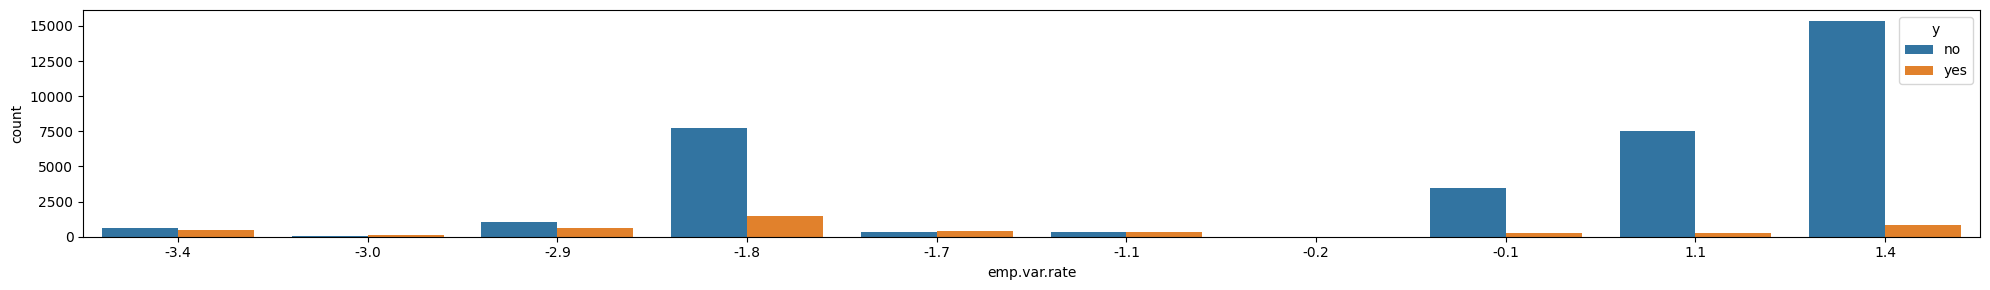

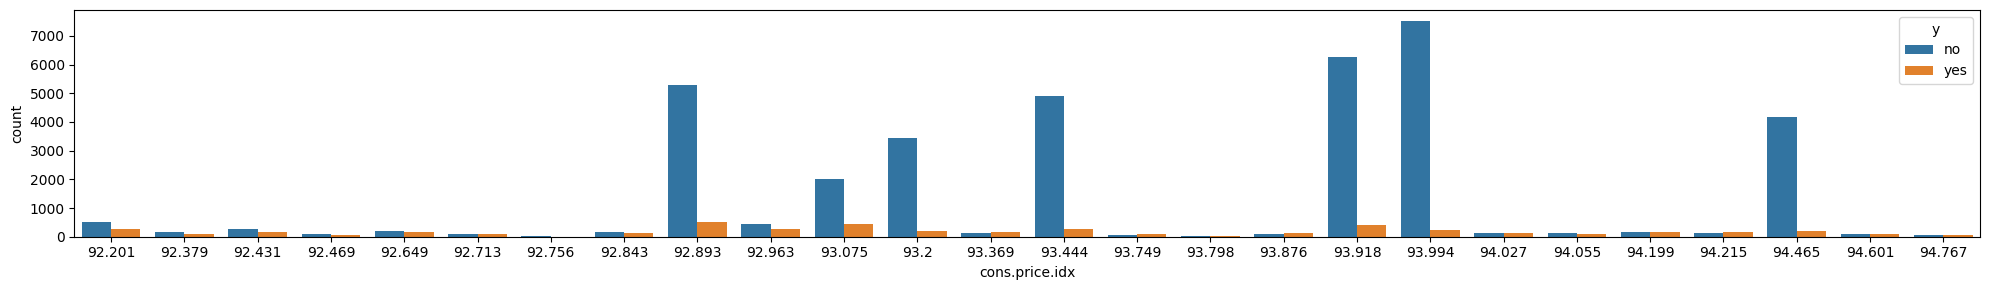

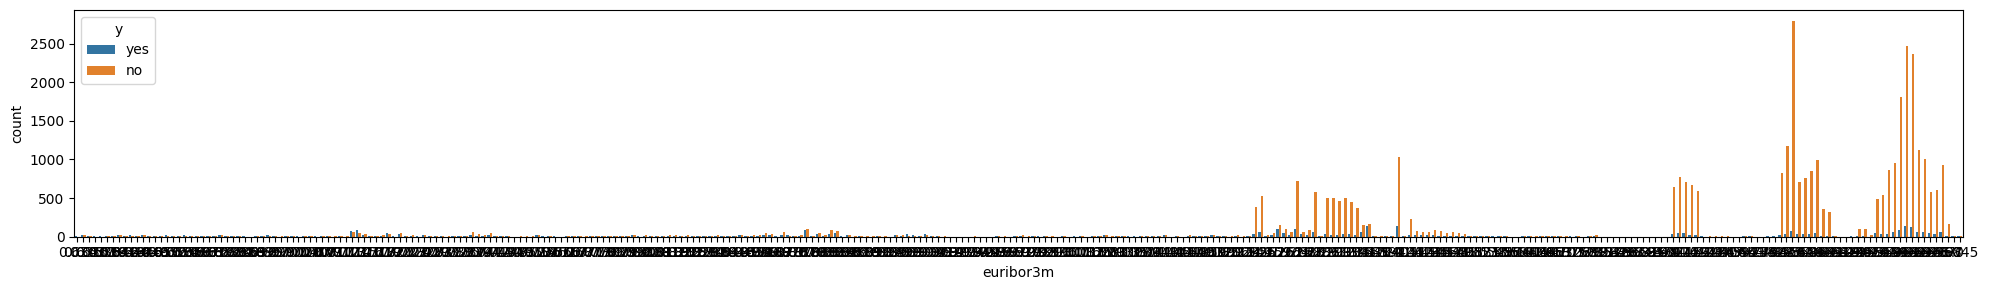

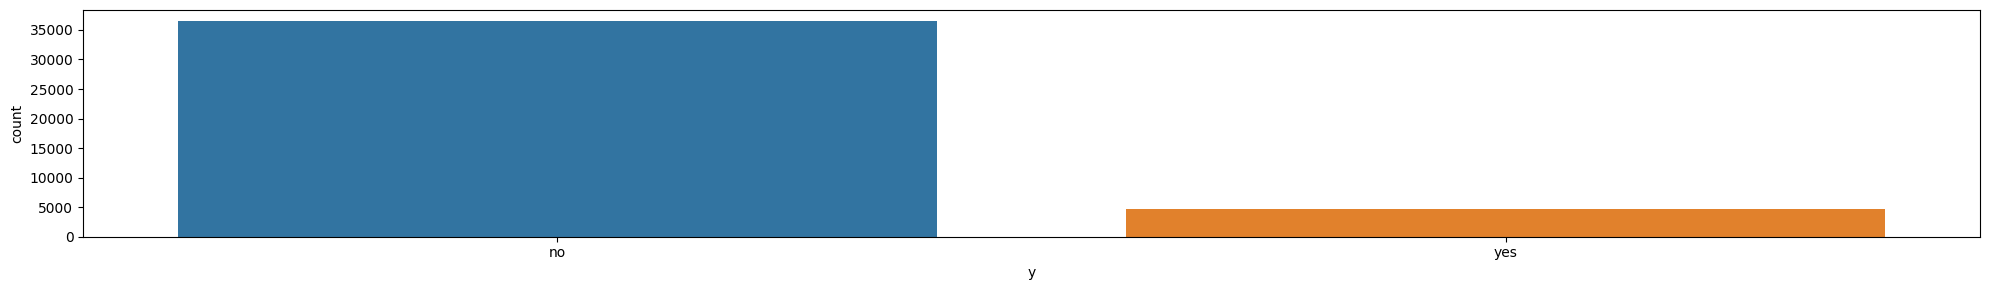

In [58]:
for columnas in df:
    fig, axis = plt.subplots(figsize=(20, 3))
    sns.countplot(data=df, x=columnas, hue="y")
    plt.tight_layout()
    plt.show()

In [59]:
df['y'] = pd.factorize(df['y'])[0]
df

,age,job,marital,education,housing,loan,contact,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,261,1,999,0,1.1,93.994,4.857,0
1,57,services,married,high.school,no,no,telephone,may,149,1,999,0,1.1,93.994,4.857,0
2,37,services,married,high.school,yes,no,telephone,may,226,1,999,0,1.1,93.994,4.857,0
3,40,admin.,married,basic.6y,no,no,telephone,may,151,1,999,0,1.1,93.994,4.857,0
4,56,services,married,high.school,no,yes,telephone,may,307,1,999,0,1.1,93.994,4.857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,334,1,999,0,-1.1,94.767,1.028,1
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,383,1,999,0,-1.1,94.767,1.028,0
41185,56,retired,married,university.degree,yes,no,cellular,nov,189,2,999,0,-1.1,94.767,1.028,0
41186,44,technician,married,professional.course,no,no,cellular,nov,442,1,999,0,-1.1,94.767,1.028,1


In [60]:
#construccion de un dataframe auxiliar numerico para analisis de correlaciones entre las variables
df_numerico = df.select_dtypes(include=['number'])
df_numerico['number_job'] = pd.factorize(df['job'])[0]
df_numerico['number_marital'] = pd.factorize(df['marital'])[0]
df_numerico['number_education'] = pd.factorize(df['education'])[0]
df_numerico['number_housing'] = pd.factorize(df['housing'])[0]
df_numerico['number_loan'] = pd.factorize(df['loan'])[0]
df_numerico['number_month'] = pd.factorize(df['month'])[0]
df_numerico['number_contact'] = pd.factorize(df['contact'])[0]

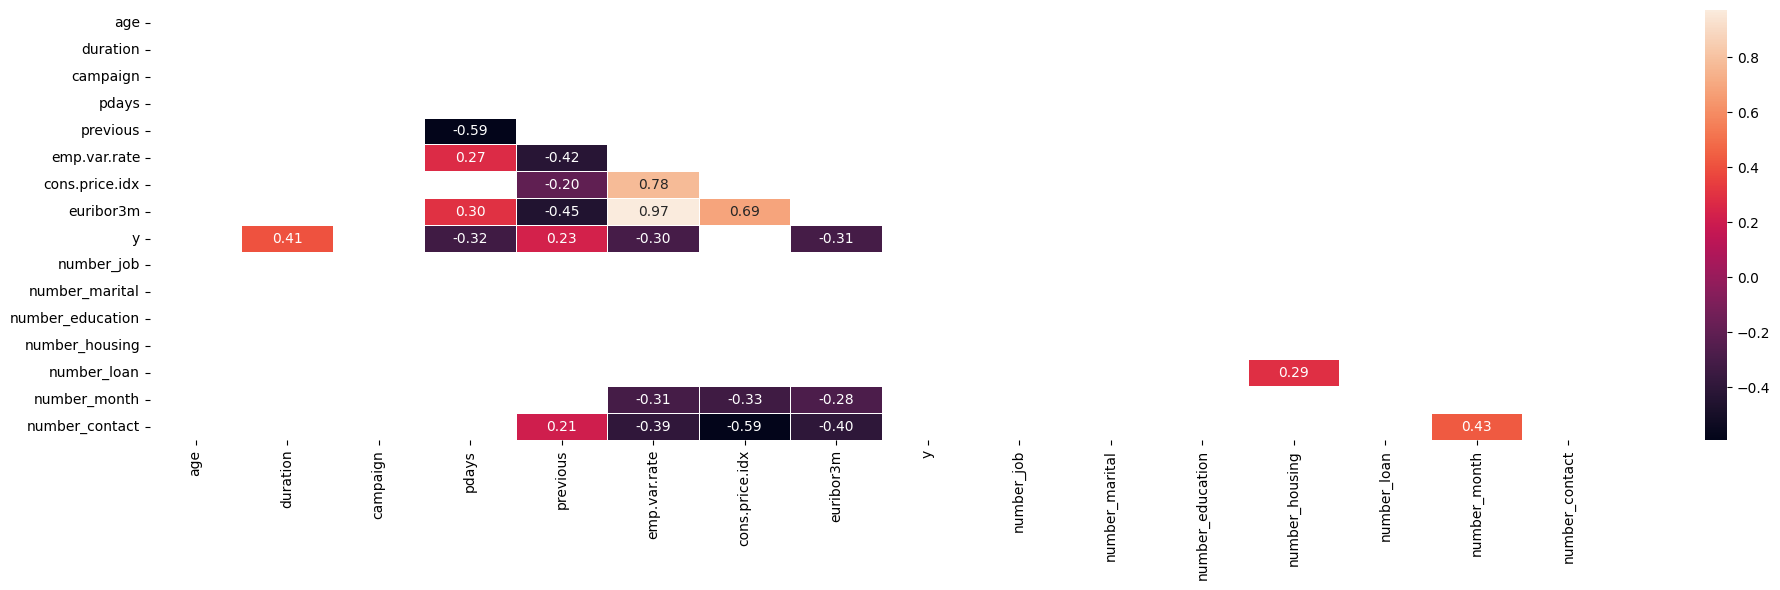

In [61]:

corr = df_numerico.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
significant_corr = corr[abs(corr) > 0.2]
significant_corr
fig, axis = plt.subplots(figsize=(20, 6))
sns.heatmap(significant_corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()

al observar una correlacion de 0.97 entre la variable de euribor3m y emp.var.rate se eliminira del dataframe la variable euriborn3m

In [62]:
df.drop(["euribor3m"], axis=1, inplace=True)
df

,age,job,marital,education,housing,loan,contact,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,261,1,999,0,1.1,93.994,0
1,57,services,married,high.school,no,no,telephone,may,149,1,999,0,1.1,93.994,0
2,37,services,married,high.school,yes,no,telephone,may,226,1,999,0,1.1,93.994,0
3,40,admin.,married,basic.6y,no,no,telephone,may,151,1,999,0,1.1,93.994,0
4,56,services,married,high.school,no,yes,telephone,may,307,1,999,0,1.1,93.994,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,334,1,999,0,-1.1,94.767,1
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,383,1,999,0,-1.1,94.767,0
41185,56,retired,married,university.degree,yes,no,cellular,nov,189,2,999,0,-1.1,94.767,0
41186,44,technician,married,professional.course,no,no,cellular,nov,442,1,999,0,-1.1,94.767,1


<h3>analisis de outliers</h3>


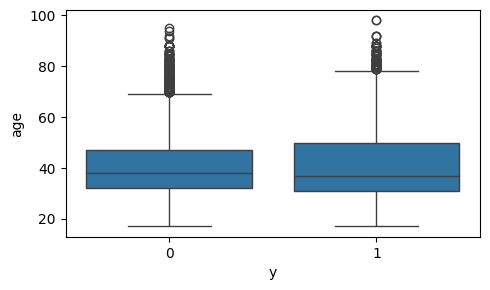

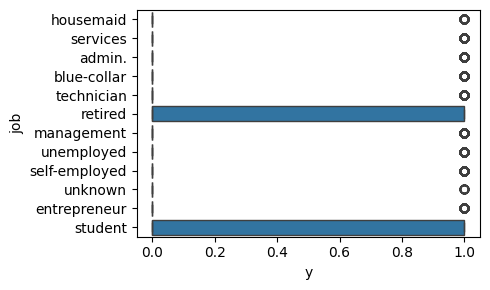

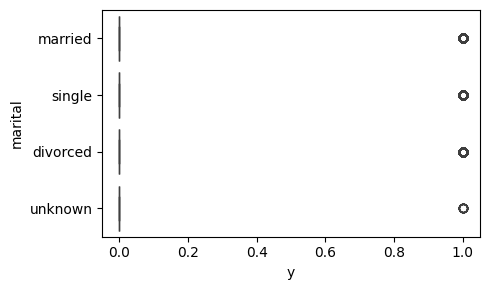

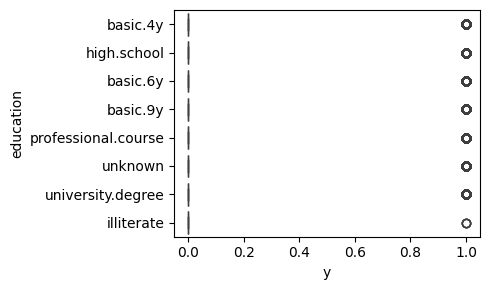

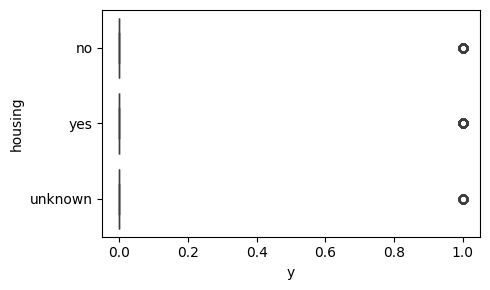

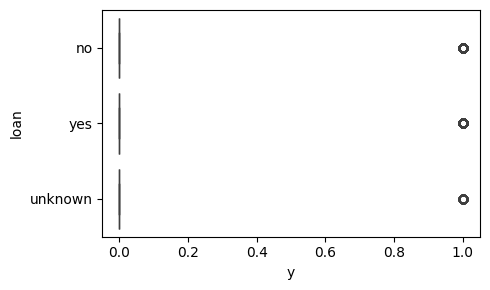

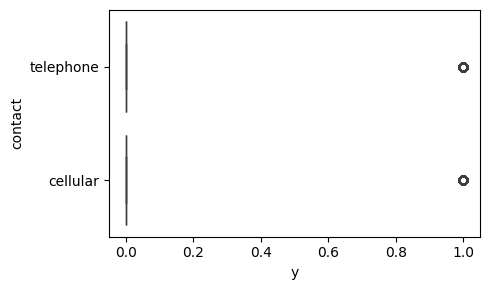

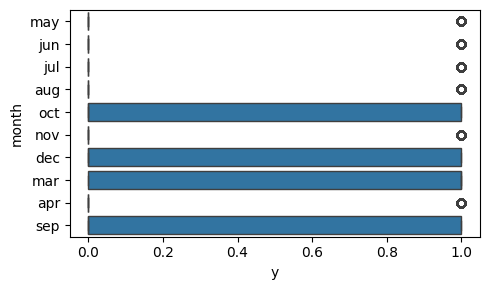

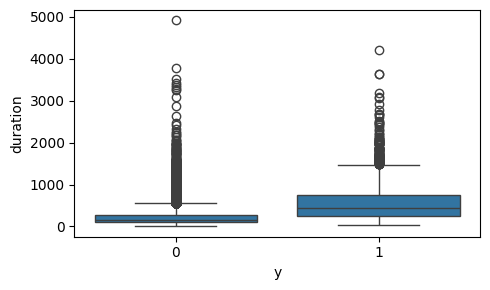

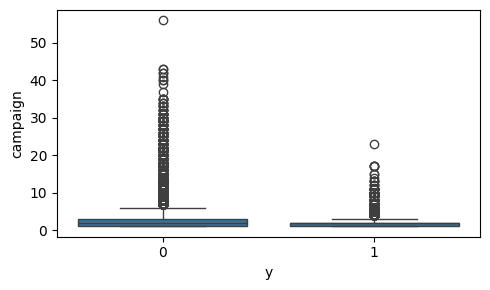

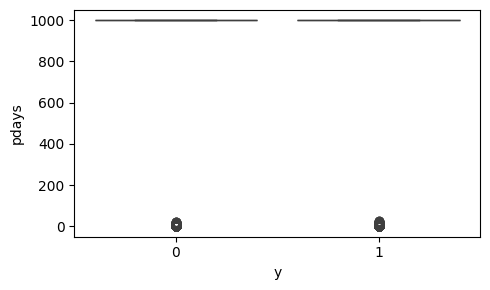

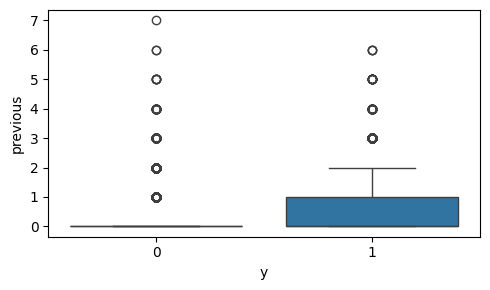

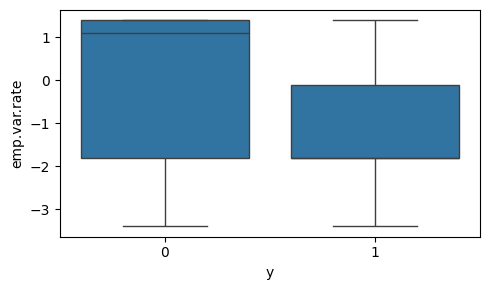

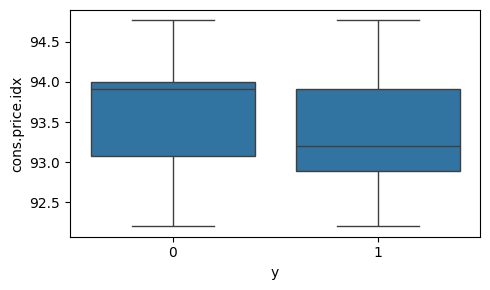

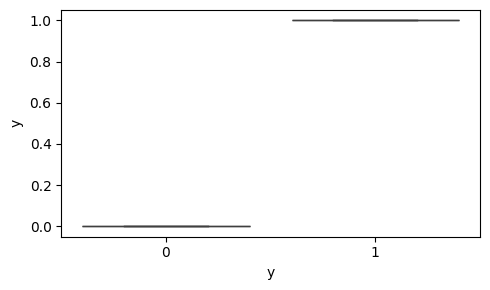

In [63]:
for columnas in df:
    fig, axis = plt.subplots(figsize=(5, 3))
    sns.boxplot(x='y', y=columnas, data=df)
    plt.tight_layout()
    plt.show()
   

<h3>split</h3>

In [64]:
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop("y", axis=1)
y = df["y"]

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [65]:
X_train

,age,job,marital,education,housing,loan,contact,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx
11348,55,retired,married,university.degree,yes,no,telephone,jun,1012,1,999,0,1.4,94.465
38879,34,management,married,university.degree,no,no,cellular,nov,75,1,999,0,-3.4,92.649
24510,53,housemaid,married,university.degree,no,no,cellular,nov,53,1,999,0,-0.1,93.200
38865,25,admin.,single,unknown,yes,no,telephone,nov,643,4,999,0,-3.4,92.649
25238,36,admin.,married,high.school,yes,no,cellular,nov,722,3,999,1,-0.1,93.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5294,34,blue-collar,married,high.school,yes,no,telephone,may,116,2,999,0,1.1,93.994
1726,59,admin.,married,university.degree,no,yes,telephone,may,186,1,999,0,1.1,93.994
35653,26,student,single,high.school,no,no,cellular,may,123,1,999,0,-1.8,92.893
25720,35,blue-collar,single,professional.course,yes,yes,cellular,nov,51,1,999,1,-0.1,93.200


In [66]:
y_test.shape

(8238,)

In [67]:
y_train

11348    1
38879    0
24510    0
38865    0
25238    0
        ..
5294     0
1726     0
35653    0
25720    0
28947    1
Name: y, Length: 32950, dtype: int64

<h3> Paso 8: Scaling & Encoding </h3>

In [68]:
# 0. Creamos copias de los conjuntos de entrenamiento: X_train | X_test
X_train_cat_le = X_train.copy()
X_test_cat_le = X_test.copy()

# 1. Creamos las instancias del encoder
label_encoder_job = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) fit
label_encoder_job.fit(X_train['job'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['job_le'] = label_encoder_job.transform(X_train['job'])
X_test_cat_le['job_le'] = label_encoder_job.transform(X_test['job'])


# 1. Creamos las instancias del encoder
label_encoder_marital = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) utilizamos: fit()
label_encoder_marital.fit(X_train['marital'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['marital_le'] = label_encoder_marital.transform(X_train['marital'])  # 3.1 train
X_test_cat_le['marital_le'] = label_encoder_marital.transform(X_test['marital'])  # 3.2 test

# 1. Creamos las instancias del encoder
label_encoder_education = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) fit
label_encoder_education.fit(X_train['education'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['education_le'] = label_encoder_education.transform(X_train['education'])
X_test_cat_le['education_le'] = label_encoder_education.transform(X_test['education'])


# 1. Creamos las instancias del encoder
label_encoder_housing = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) utilizamos: fit()
label_encoder_housing.fit(X_train['housing'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['housing_le'] = label_encoder_housing.transform(X_train['housing'])  # 3.1 train
X_test_cat_le['housing_le'] = label_encoder_housing.transform(X_test['housing'])  # 3.2 test

# 1. Creamos las instancias del encoder
label_encoder_month = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) fit
label_encoder_month.fit(X_train['month'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['month_le'] = label_encoder_month.transform(X_train['month'])
X_test_cat_le['month_le'] = label_encoder_month.transform(X_test['month'])

# 1. Creamos las instancias del encoder
label_encoder_loan = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) fit
label_encoder_loan.fit(X_train['loan'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['loan_le'] = label_encoder_loan.transform(X_train['loan'])
X_test_cat_le['loan_le'] = label_encoder_loan.transform(X_test['loan'])


# 1. Creamos las instancias del encoder
label_encoder_contact = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) utilizamos: fit()
label_encoder_contact.fit(X_train['contact'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['contact_le'] = label_encoder_contact.transform(X_train['contact'])  # 3.1 train
X_test_cat_le['contact_le'] = label_encoder_contact.transform(X_test['contact'])  # 3.2 test


X_train_cat_le.head()

,age,job,marital,education,housing,loan,contact,month,duration,campaign,...,previous,emp.var.rate,cons.price.idx,job_le,marital_le,education_le,housing_le,month_le,loan_le,contact_le
11348,55,retired,married,university.degree,yes,no,telephone,jun,1012,1,...,0,1.4,94.465,5,1,6,2,4,0,1
38879,34,management,married,university.degree,no,no,cellular,nov,75,1,...,0,-3.4,92.649,4,1,6,0,7,0,0
24510,53,housemaid,married,university.degree,no,no,cellular,nov,53,1,...,0,-0.1,93.200,3,1,6,0,7,0,0
38865,25,admin.,single,unknown,yes,no,telephone,nov,643,4,...,0,-3.4,92.649,0,2,7,2,7,0,1
25238,36,admin.,married,high.school,yes,no,cellular,nov,722,3,...,1,-0.1,93.200,0,1,3,2,7,0,0


In [69]:
# Guardamos utilizando Pickle (que nos permite guardar objetos de Python)
with open('/workspaces/betaniammc-machine-learning/models/logistic-regression-label-encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder_contact, file)
with open('/workspaces/betaniammc-machine-learning/models/logistic-regression-label-encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder_job, file)
with open('/workspaces/betaniammc-machine-learning/models/logistic-regression-label-encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder_loan, file)
with open('/workspaces/betaniammc-machine-learning/models/logistic-regression-label-encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder_month, file)
with open('/workspaces/betaniammc-machine-learning/models/logistic-regression-label-encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder_education, file)
with open('/workspaces/betaniammc-machine-learning/models/logistic-regression-label-encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder_marital, file)

<h3>Normalizacion de los datos</h3>

In [70]:
X_train_cat_le.head()


,age,job,marital,education,housing,loan,contact,month,duration,campaign,...,previous,emp.var.rate,cons.price.idx,job_le,marital_le,education_le,housing_le,month_le,loan_le,contact_le
11348,55,retired,married,university.degree,yes,no,telephone,jun,1012,1,...,0,1.4,94.465,5,1,6,2,4,0,1
38879,34,management,married,university.degree,no,no,cellular,nov,75,1,...,0,-3.4,92.649,4,1,6,0,7,0,0
24510,53,housemaid,married,university.degree,no,no,cellular,nov,53,1,...,0,-0.1,93.200,3,1,6,0,7,0,0
38865,25,admin.,single,unknown,yes,no,telephone,nov,643,4,...,0,-3.4,92.649,0,2,7,2,7,0,1
25238,36,admin.,married,high.school,yes,no,cellular,nov,722,3,...,1,-0.1,93.200,0,1,3,2,7,0,0


In [71]:
# TODO: Realizar el escalando con el dataset dividido (ahora lo estamos haciendo completo)
norm_scaler = StandardScaler()  # Instancia de: from sklearn.preprocessing import StandardScaler

num_variables = ["age", "job_le", "marital_le", "education_le", "loan_le", "contact_le", "month_le", "campaign", "previous", "duration", "emp.var.rate", "cons.price.idx", "housing_le"]
norm_features_x_train = norm_scaler.fit_transform(X_train_cat_le[num_variables])
norm_features_x_test = norm_scaler.fit_transform(X_test_cat_le[num_variables])

X_train_cat_le_scaled = pd.DataFrame(norm_features_x_train,
                       index=X_train_cat_le.index,
                       columns=num_variables)
X_test_cat_le_scaled = pd.DataFrame(norm_features_x_test,
                       index=X_test_cat_le.index,
                       columns=num_variables)
X_test_cat_le_scaled.head()

,age,job_le,marital_le,education_le,loan_le,contact_le,month_le,campaign,previous,duration,emp.var.rate,cons.price.idx,housing_le
19829,0.859182,-1.042294,-0.281188,-0.349794,-0.458942,-0.752436,-1.391711,-0.563030,-0.340641,-0.414084,0.840701,-0.221996,-1.097164
28042,-0.777804,1.463308,1.355863,1.057467,-0.458942,-0.752436,-1.820948,-0.197094,1.676759,0.139463,-1.191095,-0.862290,0.935087
22342,-0.874098,1.463308,-1.918240,1.057467,-0.458942,-0.752436,-1.391711,-0.197094,-0.340641,-0.449168,0.840701,-0.221996,0.935087
5229,1.629529,-0.763894,-0.281188,-1.757054,2.281736,1.329017,0.754473,-0.197094,-0.340641,-0.367305,0.650220,0.732372,0.935087
25731,-1.066684,0.071307,1.355863,1.057467,-0.458942,-0.752436,1.183710,-0.563030,-0.340641,2.123659,-0.111703,-0.645388,-1.097164


In [72]:
# Genera el modelo: genera una instancia de la clase LogisticRegression / Creando el modelo (vacío)
model = LogisticRegression(random_state=18)

# Entrena
model.fit(X_train_cat_le_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,18
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


##### Paso 3: Predicción del modelo

Una vez se ha entrenado el modelo, se puede utilizar para predecir con el conjunto de datos de prueba.

In [73]:
y_pred = model.predict(X_test_cat_le_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 1], shape=(8238,))

In [74]:
len(y_pred)

8238

Existe una gran cantidad de métricas para medir la efectividad de un modelo a la hora de predecir, entre ellas la **precisión** (*accuracy*), que es la fracción de predicciones que el modelo realizó correctamente.

In [75]:
model_accuracy = accuracy_score(y_test, y_pred)
model_accuracy

0.9045884923525127

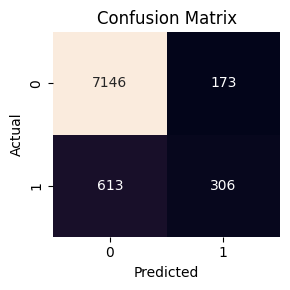

In [76]:
banco_ingreso = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
df_cm = pd.DataFrame(banco_ingreso)

plt.figure(figsize=(3, 3))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

La interpretación de una matriz de confusión es la siguiente:

- **Verdaderos positivos** (*TP, True positive*): Se corresponde con el número `7146` y son los casos en los que el modelo predijo positivo (realiza deposito a largo plazo) y la clase real también es positiva.
- **Verdaderos negativos** (*TN, False negative*): Se corresponde con el número `306` y son los casos en los que el modelo predijo negativo (no realiza deposito a largo plazo) y la clase real también es negativa.
- **Falsos positivos** (*FP, False positive*): Se corresponde con el número `613` y son los casos en los que el modelo predijo positivo (realizo deposito a largo plazo) y la clase real es negativa.
- **Falsos negativos** (*FN, False negative*): Se corresponde con el número `173` y son los casos en los que el modelo predijo negativo(no realizo deposito a largo plazo) y la clase real es positiva.

Estas cuatro medidas se utilizan a menudo para calcular métricas más complejas.

##### Paso 4: Optimización de resultados

Como hemos visto, el modelo base (con todos los parámetros predefinidos) de la regresión logística obtiene poco más de un 90% de precisión. Sin embargo, el hecho de modificar los parámetros del modelo podría suponer una mejora (o empeoramiento) significativos de los resultados. Existen varias estrategias como los modelos regularizados.

In [77]:
# Definimos los parámetros que queremos ajustar a mano
hyperparams = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'penalty': ['l1', 'l2', 'elasticnet', None],
               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Inicializamos la cuadrícula
grid = GridSearchCV(model,
                    hyperparams,
                    scoring="accuracy",
                    cv=5)
grid

,estimator,LogisticRegre...ndom_state=18)
,param_grid,"{'C': [0.001, 0.01, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


# factorize general
categorical_variables = df.select_dtypes(include=['object']).columns.tolist()
df_copy = df.copy()
print (categorical_variables)

for var in categorical_variables:
    codes, uniques = pd.factorize(df[var])
    df_copy[var] = codes  

df_copy

In [79]:
grid.fit(X_train_cat_le_scaled, y_train)

grid.best_params_

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: U

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Como vemos, los parámetros optimizados utilizando esta técnica son:

- `C`: 1
- `penalty`: l1
- `solver`: liblinear

Además, siempre debemos

In [80]:
grid.best_estimator_

,penalty,'l1'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,18
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


s utilizar el conjunto de datos de entrenamiento para ajustarlo. Ahora solo tenemos que repetir el entrenamiento estableciendo estos parámetros en el modelo:

In [81]:
# best_model_grid = LogisticRegression(penalty='l1',
#                                      C=1,
#                                      solver='liblinear')
# best_model_grid.fit(X_train, y_train)
best_model_grid = grid.best_estimator_

y_pred_grid = best_model_grid.predict(X_train_cat_le_scaled,)

grid_accuracy = accuracy_score(y_train, y_pred_grid)

model_accuracy, grid_accuracy

(0.9045884923525127, 0.9006676783004552)

In [82]:
grid_accuracy - model_accuracy

-0.003920814052057464

aqui podemos observar que el modelo  ha desmejorado de un 90.45% a un 90.06% por lo cual no siempre una optimizacion de resultados nos da realmente una mejora